In [ ]:
import os
import sys

sys.path.append("/Users/mansikhamkar/work/clarifai/clarifai-python-datautils")
os.environ['CLARIFAI_PAT'] = ''

In [2]:

from clarifai_datautils.multimodal import Pipeline
from clarifai_datautils.multimodal.pipeline.cleaners import Clean_extra_whitespace
from clarifai_datautils.multimodal.pipeline.extractors import ExtractEmailAddress
from clarifai_datautils.multimodal.pipeline.PDF import PDFPartitionMultimodal

# Define the pipeline
pipeline = Pipeline(
    name='pipeline-1',
    transformations=[
        PDFPartitionMultimodal(chunking_strategy = "by_title",max_characters = 1024),
        Clean_extra_whitespace()
    ]
)
pipeline

In [4]:
elements = pipeline.run(files="./200945-1.p65.pdf", loader=False)
elements

Applying Transformations: 100%|██████████| 2/2 [00:25<00:00, 12.83s/it]


In [5]:
len(elements)

42

[255 216 255 ...   3 255 217]


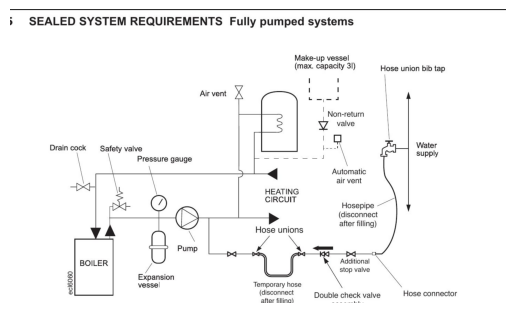

In [6]:
# Display the image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import base64

# Base64 image to numpy array
im_b = base64.b64decode(elements[-1].metadata.image_base64)
image_np = np.frombuffer(im_b, np.uint8)
print(image_np)
img_np = cv2.imdecode(image_np, cv2.IMREAD_COLOR)

plt.axis('off')
plt.imshow(img_np[...,::-1])

In [2]:

from clarifai_datautils.multimodal import Pipeline
from clarifai_datautils.multimodal.pipeline.cleaners import Clean_extra_whitespace
from clarifai_datautils.multimodal.pipeline.extractors import ExtractEmailAddress
from clarifai_datautils.multimodal.pipeline.PDF import PDFPartitionMultimodal
from clarifai_datautils.multimodal.pipeline.summarizer import ImageSummarizer

# Define the pipeline
new_pipeline = Pipeline(
    name='pipeline-1',
    transformations=[
        PDFPartitionMultimodal(chunking_strategy = "by_title",max_characters = 1024),
        Clean_extra_whitespace(),
        ImageSummarizer()
    ]
)
new_pipeline

In [8]:
new_elements = new_pipeline.run(files="./200945-1.p65.pdf", loader=False)
new_elements

Applying Transformations: 100%|██████████| 3/3 [02:03<00:00, 41.26s/it]


In [5]:
len(new_elements)

52

In [6]:
new_elements[-1].to_dict()

{'type': 'CompositeElement',
 'element_id': 'summarized_40cc26c3-768d-44e2-baaa-4007bbc44f71',
 'text': 'GENERAL Installation pipes MUST be fitted in accordance with BS. 6891. In IE refer to I.S. 813:2002. Pipework from the meter to the boiler MUST be of an adequate size. Do not use pipes of a smaller size than the boiler gas connection. Grasslin (UK) Ltd., Tower House, Vale Rise, Tonbridge, Kent TN9 1TB. Tel: +44 (0) 1732 359 888. Fax: +44 (0) 1732 354 445 www.tfc-group.co.uk The complete installation MUST be tested for gas soundness and purged as described in the above code. \n Sealed system requirements for fully pumped systems. Safety valve, expansion vessel, and hose union are all necessary components.',
 'metadata': {'source_element_id': '40cc26c3-768d-44e2-baaa-4007bbc44f71',
  'is_original': False}}

In [3]:
# Using SDK to upload
from clarifai.client import Dataset
dataset = Dataset(url='https://clarifai.com/mansi_k/datautils_testapp/datasets/d1', pat=os.environ['CLARIFAI_PAT'])
dataset.upload_dataset(new_pipeline.run(files="/Users/mansikhamkar/work/clarifai/clarifai-python-datautils/tests/pipelines/assets/Multimodal_sample_file.pdf", loader=True))

Applying Transformations:  33%|███▎      | 1/3 [00:08<00:16,  8.04s/it]

2
dict_keys(['detection_class_prob', 'coordinates', 'last_modified', 'filetype', 'languages', 'page_number', 'image_base64', 'image_mime_type', 'file_directory', 'filename', 'is_original', 'input_id'])
dict_keys(['detection_class_prob', 'coordinates', 'last_modified', 'filetype', 'languages', 'page_number', 'image_base64', 'image_mime_type', 'file_directory', 'filename', 'is_original', 'input_id'])


Applying Transformations: 100%|██████████| 3/3 [00:44<00:00, 14.69s/it]


########
2
<class 'unstructured.documents.elements.Image'>
dict_keys(['detection_class_prob', 'coordinates', 'last_modified', 'filetype', 'languages', 'page_number', 'image_base64', 'image_mime_type', 'file_directory', 'filename', 'is_original', 'input_id'])
<class 'unstructured.documents.elements.Image'>
dict_keys(['detection_class_prob', 'coordinates', 'last_modified', 'filetype', 'languages', 'page_number', 'image_base64', 'image_mime_type', 'file_directory', 'filename', 'is_original', 'input_id'])


Uploading Dataset: 100%|██████████| 1/1 [00:29<00:00, 29.36s/it]
